<a href="https://colab.research.google.com/github/KomalT2003/ImageProcessing/blob/main/COMPRESSION_DWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

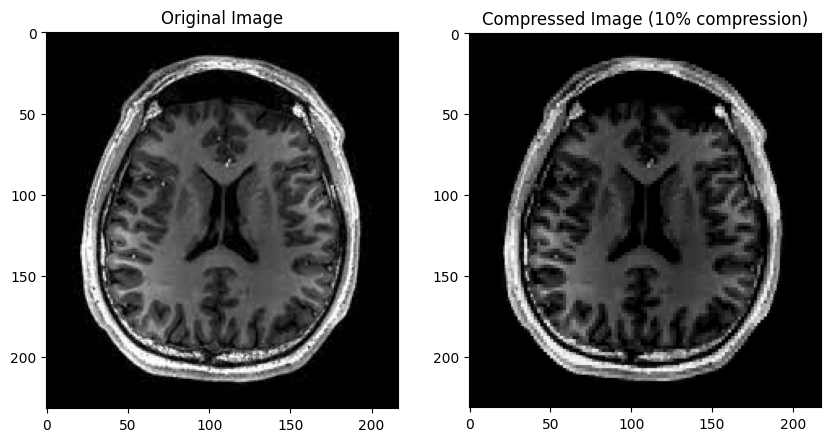

In [ ]:
# EXP 10
# HAAR DWT
# provides an easy way of compression as the coefficient
# are either 1 or -1
#HAAR DWT TECHNIQUE

import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image

def image_compress(input_image_path, output_image_path, compression_ratio=0.5):

    original_image = Image.open(input_image_path)


    if original_image.mode == 'RGBA':
        original_image = original_image.convert('RGB')

    original_array = np.array(original_image)


    coefficients = pywt.dwt2(original_array, 'bior1.3')


    threshold = compression_ratio * np.max(np.abs(coefficients[0]))
    coefficients = [pywt.threshold(c, threshold, mode='soft') for c in coefficients]


    compressed_array = pywt.idwt2(coefficients, 'bior1.3')


    compressed_array = np.clip(compressed_array, 0, 255)


    compressed_image = Image.fromarray(compressed_array.astype(np.uint8))
    compressed_image.save(output_image_path)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_array, cmap='gray')
    plt.title('Compressed Image ({}% compression)'.format(int(compression_ratio * 100)))

    plt.show()


input_image_path = '/content/brain.png'
output_image_path = '/content/braincomp.png'
compression_ratio = 0.1

image_compress(input_image_path, output_image_path, compression_ratio)
